### Sampling Distributions

During a class a couple of years ago, an econometrics professor devoted a significant portion of the lecture to making sure that we properly understood the concept of a _standard error_ and why it was subtly different to the _standard deviation_. In order to fully grasp the difference, he explained, we had to get a handle on what we mean when we talk about the _sampling distribution_. I think it's valuable to go over it here, and I'm going to use a question from Wasserman's _All of Statistics_ (Ch.3, Ex.19) that also seeks to make this topic clear.

Suppose we have data $X_1, ..., X_n$, I.I.D. and with mean $\mu$ and variance $\sigma^2$. This data represents a sample from the population, and it's one of many samples we could have drawn. Imagine that each number represents the height of a person in Brooklyn, and have sampled randomly on the street _n_ people. Were we to repeat this exercise the next day, we'd have a different sample of people - but they'd be drawn from the same population. (Let's ignore, for the sake of brevity, the fact that people commute in and out of Brooklyn!)

We can calculate the arithmetic average, $\bar{X}$ of our sample to obtain a _sample statistic_ (and the arithmetic average is only one of many possibilities). Given that $\bar{X}$ is a function of the sample (which is random), then it's a random variable. As it's a random variable, it has a distribution. __This__ is the _sampling distribution_: it's the distribution of a sample statistic. And it's _really_ important to not that __this is not the distribution of X__, but of $\bar{X}$.

Note that the sampling distribution applies to _any_ statistic based on the sample: it doesn't have to be the sample mean. But that's the common statistic we use for most purposes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng(1)

For the Uniform(0,1) distribution, there is an analytical solution for both the expectation and the variance of X_bar.

$$E(\bar{X}_n) = E(n^{-1} \sum_1^n X_{i}) = n^{-1} \sum_1^n E(X_{i}) = \frac{1}{2}$$ 

where the second equality is by linearity of the expectation, and

$$V(\bar{X}_n) = V(n^{-1} \sum_1^n X_{i}) = n^{-2} \sum_1^n V(X_{i}) = \frac{1}{12n}$$ 

where the second equality is by Theorem 3.17 (taking the constant in and then back out of the summation), and the final equality is by $\sum_1^n V(X_{i}) = nV(X_{i})$.

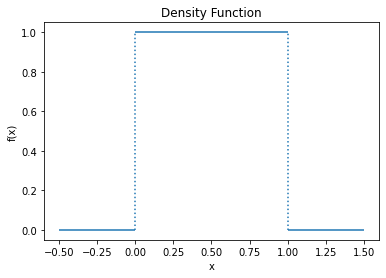

In [3]:
fig, ax = plt.subplots()
ax.hlines(0, xmin=-0.5, xmax=0, color='C0')
ax.hlines(1, xmin=0, xmax=1, color='C0')
ax.hlines(0, xmin=1, xmax=1.5, color='C0')
ax.vlines([0, 1], ymin=0, ymax=1, color='C0', linestyle=':')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Density Function')
plt.show()

For each n from 1 to 100, we will:
- draw n values from the uniform distribution, and calculate the mean value. this is our sample statistic.
- repeat this 100 times, to obtain 100 sample statistics for a draw of n values.
- calculate and store the mean and variance of these 100 sample statistics, according to the size of n.

In [4]:
samples = 100

means = np.empty(100)
variances = np.empty(100)

for n in range(1,101):
    sample = rng.uniform(0, 1, size = (samples, n)).mean(axis=1)
    #print(sample)
    means[n-1] = sample.mean()
    variances[n-1] = sample.var()

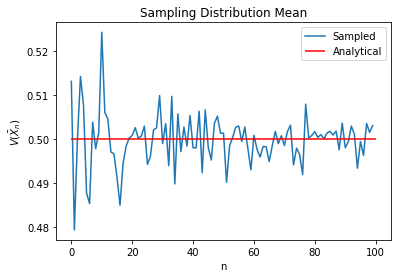

In [5]:
fig, ax = plt.subplots()
ax.plot(means, label="Sampled")
ax.hlines(0.5, xmin=0, xmax=100, color='red', label="Analytical")
ax.set_xlabel("n")
ax.set_ylabel(r"$V(\bar{X}_n)$")
ax.set_title("Sampling Distribution Mean")
ax.legend()
plt.show()

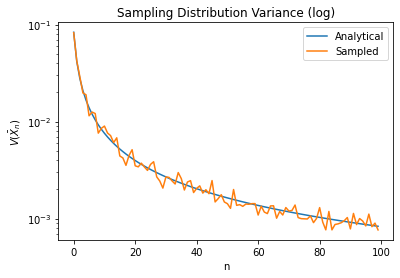

In [6]:
fig, ax = plt.subplots()
ax.plot([1/(12 * i) for i in range(1, 101)], label="Analytical")
ax.plot(variances, label="Sampled")
ax.set_xlabel("n")
ax.set_ylabel(r"$V(\bar{X}_n)$")
ax.set_yscale('log')
ax.set_title("Sampling Distribution Variance (log)")
ax.legend()
plt.show()

One of the observations we can make about the expected value $E(\bar{X}_n)$ of the sample mean is that, as the sample size n increases, we see the expected value of the sample statistic converging toward the caluclated number of 0.5. This happens relatively quickly: the convergence doesn't really improve as we get a sample size (n) above 25 or so. This tells us that we can approximate the population mean $\mu$ using the sample mean, as long as we have sufficient data.
This is the idea encapsulated by the Law of Large Numbers.

A second observation we can make based on our data is the declining variance of the sample mean as our sample size increases. This tells us that, as we expected based on the analytical result, we see less dispersion of the sample means we calculate as we use larger samples.

A final note to make here is on the definition of the _standard error_. That comes up a lot in the discussion of statistical inference, and it is important to note that it is the standard deviation of the sampling distribution, so $\sqrt{V(\bar{X}_n)}$. Although we approximate it using the standard deviation of our data, it is measuring _the dispersion of the sample mean_.

Next we can look at the distribution of the sample mean for a fixed sample size, n=100. We are taking 10000 random samples from the same Uniform(0,1) distribution as before, and finding the mean of each sample. These means are collected into an array, and we plot a histogram from that array. We see from the histogram that the sample mean has a distribution that is approximately Normal in shape, and is centred around the expected value.

This is the basic idea of the Central Limit Theorem: that we can take a sample of data that comes from _any_ distribution, calculate the mean of the sample, and (under certain assumptions) the sample mean will be distributed approximately normally around the population mean $\mu$. The distribution can be any shape, known or unknown, and this property will hold - so long as the sample values are independent, and the underlying distribution has finite mean and variance! (See [here](https://stats.stackexchange.com/questions/74268/cauchy-distribution-and-central-limit-theorem) for a discussion of why the CLT doesn't hold when the underlying distribution is Cauchy)

This result is a backbone of much of statistical inference because it allows us to make statements about the distribution of a pretty simple statistic from out data (the mean), without having any knowledge about the distribution of the population.

In [7]:
distributional_data = rng.uniform(0, 1, size = (10000, 100)).mean(axis=1)

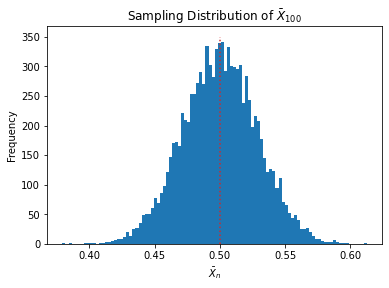

In [8]:
fig, ax = plt.subplots()
ax.hist(distributional_data, bins=100)
ax.vlines(distributional_data.mean(), ymin=0, ymax=350, color='C3', linestyle=':')
ax.set_xlabel(r"$\bar{X}_n$")
ax.set_ylabel("Frequency")
ax.set_title(r"Sampling Distribution of $\bar{X}_{100}$")
plt.show()